In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
a_renomear = {'unfinished':'nao_finalizado', 'expected_hours':'horas_esperadas','price':'preco'}
dados = dados.rename(columns=a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
troca = {0:1, 1:0}
dados['finalizado'] = dados['nao_finalizado'].map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


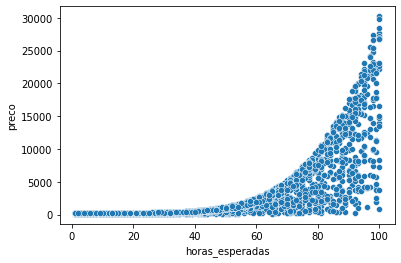

In [5]:
import seaborn as sns

sns.scatterplot(x='horas_esperadas',y='preco',data=dados)

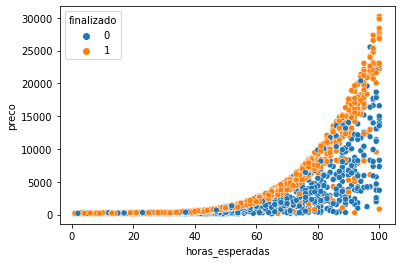

In [6]:
sns.scatterplot(x='horas_esperadas',y='preco',data=dados, hue='finalizado')

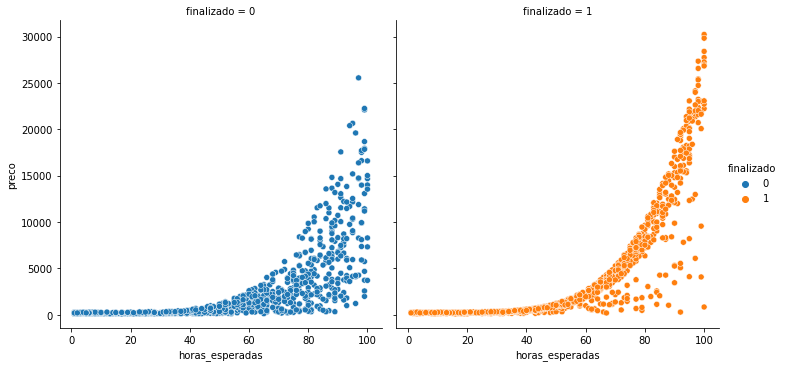

In [7]:
sns.relplot(x='horas_esperadas',y='preco',data=dados, col='finalizado',hue='finalizado')

In [8]:
x = dados[['horas_esperadas','preco']]
y = dados['finalizado']

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y,random_state=SEED, test_size=0.25,stratify=y)
print('Treinamos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC(dual=False)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) * 100
print('A acurácia do modelo foi de %.2f%%' %acuracia)

Treinamos com 1617 elementos e testaremos com 540 elementos
A acurácia do modelo foi de 54.44%


In [9]:
import numpy as np

previsoes_de_base = np.ones(540)

acuracia = accuracy_score(teste_y,previsoes_de_base) * 100
print('A acurácia do algoritmo de baseline foi de %.2f%%' %acuracia)

A acurácia do algoritmo de baseline foi de 52.59%


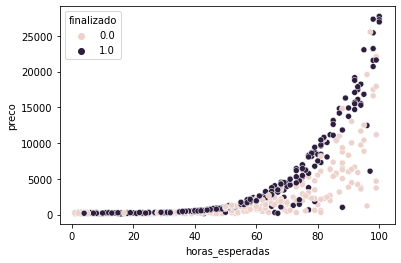

In [10]:
sns.scatterplot(x='horas_esperadas',y='preco',data=dados, hue=teste_y)

In [11]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [12]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [13]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

In [14]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

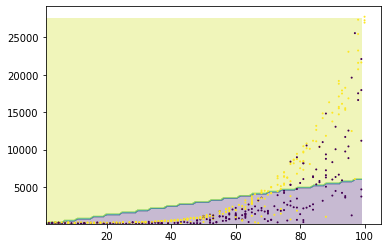

In [15]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25,stratify=y)
print('Treinamos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

scaler = StandardScaler() 
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x=scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes) * 100

print('A acurácia do modelo foi de %.2f%%' %acuracia)

Treinamos com 1617 elementos e testaremos com 540 elementos
A acurácia do modelo foi de 66.85%


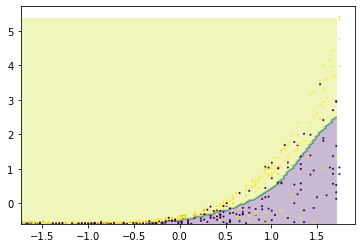

In [20]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(),yy.ravel()] 

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


plt.contourf(xx,yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)